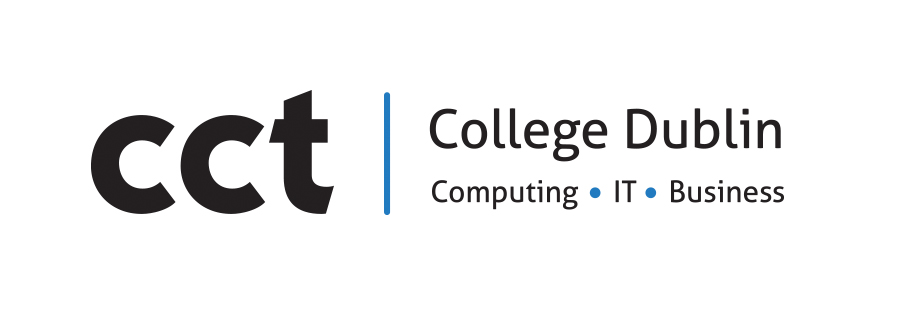


# CA2: Machine Learning - Naive Bayes vs KNN

### Student: `Lauro Cesar Ribeiro - 2016291`  Lecturer: `David McQuaid` Year: `4` Level: `8`

## Table of Contents
1. [Importing dependencies](#p1)
2. [Importing dataset](#p2)
3. [Data Manipulation](#p3)
4. [Univariate Analysis](#p4)
5. [Bi-variate Analysis](#p5)
6. [Machine Learning Data Preparation](#p6)
7. [Machine Learning Algorithm Task](#p7)
8. [Conclusion](#p8)
9. [Create a Pipeline](#p9)
10. [References](#p10)


# <a name="p1">Importing Dependencies</a>

Importing required libraries for Data Manipulation, Visualization, and for eventually any warnings occur.

In [1]:
import pandas as pd
import numpy as np


import matplotlib.pyplot as plt

plt.style.use('ggplot')
import seaborn as sns

sns.set_palette(sns.color_palette())
%matplotlib inline


import warnings
warnings.filterwarnings("ignore")


import datetime as dt


# <a name="p2">Import Dataset</a>

The dataset contains a list of patients who might suffer from `alcoholism`, `diabetes`, `hypertension`, or `disability`; they are boolean values, other patient information like `gender`, `age`, `neighbourhood`, `appointment` and `scheduling times`. There is a `No-show column` that tells us if the patient visited the doctor, and it will be `crucial` to the `Machine Learning` section, where it will `predict` if a `patient attended or not` for their `consultation`.

`Dimensions` - 110527 rows, 14 columns

**PatientId** - Patient identification<br>
**AppointmentID**  - Each appointment identification<br>
**Gender** - Male or Female<br>
**ScheduledDay**- The appointment register date.<br>
**AppointmentDay**- Appointment day.<br>
**Age** - Patient age<br>
**Neighbourhood** - Patient/Clinic Locality.<br>
**Scholarship** - 1- Received  and 0-Not Received<br>
**Hipertension** - 1-Suffering and 0-Not Suffering<br>
**Diabetes** - 1-Suffering and 0-Not Suffering<br>
**Alcoholism** - 1-Suffering and 0-Not Suffering<br>
**Handcap** - 1-Handicap and 0-Not a Handicap<br>
**SMS_received** - 1- SMS Received and 0- SMS Not Received<br>
**No-show** - True or False<br>

In [2]:
medical = pd.read_csv('Medical Appointment No Shows.csv')

# <a name="p3">Data Manipulation</a>

Here we are checking the first 5 rows in my medical object, the shape of it, removing any duplicate value and checking the column names.

In [3]:
medical.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [4]:
medical.shape

(110527, 14)

In [5]:
medical.drop_duplicates()
medical.shape

(110527, 14)

In [6]:
medical.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

### Rename Misspelt Columns

We have noticed that `Hypertension` and `Handicap` are misspelt, so we will fix them.

In [7]:
medical = medical.rename(columns={"Hipertension": "Hypertension", "Handcap":"Handicap"})

### Verify Data Types

To go further in our data cleaning and manipulation, we have to assure the data types that we are working with, to see whether they correspond or not.

In [8]:
medical.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hypertension        int64
Diabetes            int64
Alcoholism          int64
Handicap            int64
SMS_received        int64
No-show            object
dtype: object

### Adjust Inconsistent Data Types

At this point, we noticed that would be better to switch `Scholarship`, `Hypertension`, `Diabetes`, `Alcoholism` and `Handicap` columns from **Integer** to **Boolean**, we think this way makes more sense when we start the Data Visualization section of this report.

In [9]:
for each in ["Scholarship", "Hypertension", "Diabetes", "Alcoholism", "Handicap"]:
    medical[each] = medical[each].astype(np.bool)

### Convert Datetime

**ScheduledDay** and **AppointmentDay** are `object types` in our initial Dataframe to convert them to `Datetime` and `Timezones` right after.

In [10]:
medical['ScheduledDay'] = pd.to_datetime(medical['ScheduledDay'])
medical['AppointmentDay'] = pd.to_datetime(medical['AppointmentDay'])


medical['ScheduledDay'] = medical['ScheduledDay'].dt.tz_localize(None)
medical['AppointmentDay'] = medical['AppointmentDay'].dt.tz_localize(None)

### Check Null Values

Hopefully there are no null values in our Dataframe

In [11]:
medical.isnull().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hypertension      0
Diabetes          0
Alcoholism        0
Handicap          0
SMS_received      0
No-show           0
dtype: int64

# <a name="p4">Univariate Analysis</a>

### Unique PatientIds and AppointmentIds

There are only *62299* unique `PatientID`, while the number of unique `AppointmentID` is *110527*. It shows that the recurring patients make `43%` of the appointments.

In [12]:
unique_patienids = medical['PatientId'].nunique()
unique_appointmentids = medical['AppointmentID'].nunique()
recurring_patients = (unique_appointmentids - unique_patienids)/unique_appointmentids

print('Unique PatientIds :' + str(unique_patienids))
print('Unique AppointmentIds :' + str(unique_appointmentids))
print('% of recurring patients:'+ str(recurring_patients))

Unique PatientIds :62299
Unique AppointmentIds :110527
% of recurring patients:0.4363458702398509


### Gender

F    0.649977
M    0.350023
Name: Gender, dtype: float64
Total Patients:110527


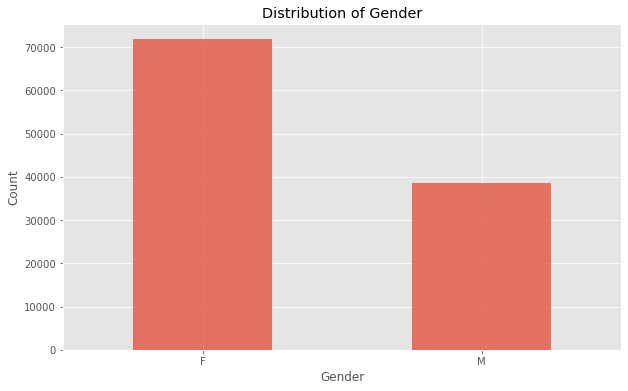

In [13]:
print(medical['Gender'].value_counts(normalize = True))
print('Total Patients:' + str(medical['Gender'].value_counts().sum()))

plt.figure(figsize=(10,6))
medical['Gender'].value_counts().plot(kind= 'bar',alpha=0.75, rot=0)
plt.title('Distribution of Gender')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

There are **110527 appointments** in total. 
`65%` of the reserved appointments are by `Female`, and `Male` reserves `35%`. 
It indicates that the probability of ill health is distributed disproportionately between the Male and Female. 

### Handicap

There are `2241 disabled` patients.

In [14]:
medical['Handicap'].value_counts()

False    108286
True       2241
Name: Handicap, dtype: int64

### Age

In [15]:
print('Descriptive Statistics for "Age" Column')
print(medical['Age'].describe())

Descriptive Statistics for "Age" Column
count    110527.000000
mean         37.088874
std          23.110205
min          -1.000000
25%          18.000000
50%          37.000000
75%          55.000000
max         115.000000
Name: Age, dtype: float64


The descriptive statistics show that the `patients' minimum age is -1`, a data entry error — `removing` the rows with `negative age` in the next step.
Age can have a zero value because it may possibly have a presence of toddlers in the data.


In [16]:
medical = medical[medical['Age'] >= 0]

In [17]:
print(len(medical[medical['Age'] == 0]))
medical[medical['Age'] == 0].head()

3539


,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMS_received,No-show
59,7.184428e+13,5638545,F,2016-04-29 08:08:43,2016-04-29,0,CONQUISTA,False,False,False,False,False,0,No
63,2.366233e+14,5628286,M,2016-04-27 10:46:12,2016-04-29,0,SÃO BENEDITO,False,False,False,False,False,0,No
64,1.885174e+14,5616082,M,2016-04-25 13:28:21,2016-04-29,0,ILHA DAS CAIEIRAS,False,False,False,False,False,1,No
65,2.718818e+14,5628321,M,2016-04-27 10:48:50,2016-04-29,0,CONQUISTA,False,False,False,False,False,0,No
67,8.647128e+13,5639264,F,2016-04-29 08:53:02,2016-04-29,0,NOVA PALESTINA,False,False,False,False,False,0,No


We can consider the assumption that `0 age patients as toddlers` appropriate, they received `no scholarships` and **are not suffering from any diseases** as we can see above. So, there are 3`539 toddler appointments` in the data.

### Age Distribution

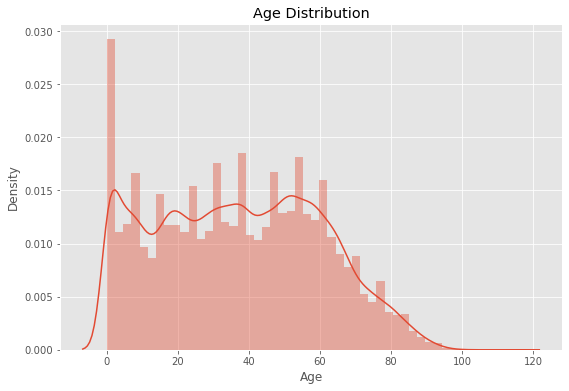

In [18]:
plt.figure(figsize=(9,6))
sns.distplot(medical['Age'])
plt.title('Age Distribution')
plt.show()

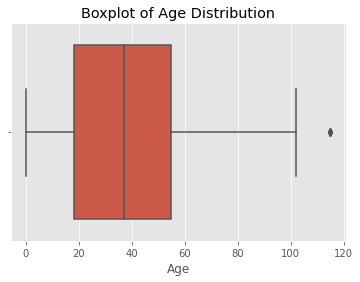

In [19]:
sns.boxplot(medical['Age'])
plt.title('Boxplot of Age Distribution')
plt.show()

The `highest age` recorded is `115 years`. <br>
The `average age` of the patients is approximately `37 years`. <br>
`50%` of the patients are between the age of `18-55 years`.<br>

**For a better understanding of the age Distribution, we will create a new Column named "Age Category" column, where we will break it into small groups.**

Adults      0.532517
Children    0.210421
Senior      0.130304
Youth       0.126758
Name: Age Category, dtype: float64


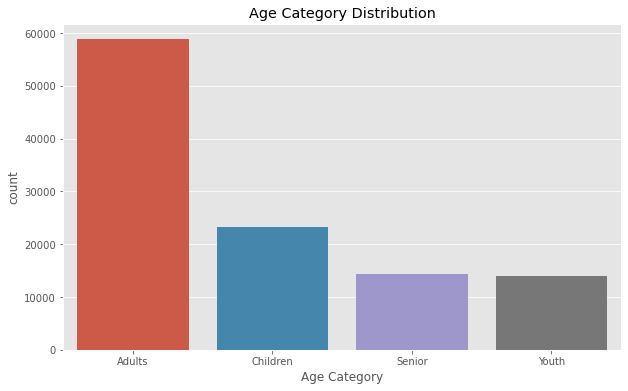

In [20]:
def categorize_age(age):
    if (age >= 0) & (age <=14):
        return 'Children'
    elif (age >= 15) & (age <=24):
        return 'Youth'
    elif (age >= 25) & (age <=64):
        return 'Adults'
    else:
        return 'Senior'

medical['Age Category'] = medical['Age'].apply(categorize_age)
print(medical['Age Category'].value_counts(normalize = True))

plt.figure(figsize=(10,6))
sns.countplot(medical['Age Category'])
plt.title('Age Category Distribution')
plt.show()

**`53% `of the patients in the data are `Adults`, `21%` of `children` ,`13%` of `Seniors` and `12% `of `Youth`.**

### Neighbourhoods

In [21]:
print('Unique Neighbourhoods number in the data: ' + str(medical['Neighbourhood'].nunique()))
print('The top 10 neighbourhoods with the highest number of entries are:')
print(medical['Neighbourhood'].value_counts().head(10))

Unique Neighbourhoods number in the data: 81
The top 10 neighbourhoods with the highest number of entries are:
JARDIM CAMBURI       7717
MARIA ORTIZ          5805
RESISTÊNCIA          4431
JARDIM DA PENHA      3877
ITARARÉ              3514
CENTRO               3334
TABUAZEIRO           3132
SANTA MARTHA         3131
JESUS DE NAZARETH    2853
BONFIM               2773
Name: Neighbourhood, dtype: int64


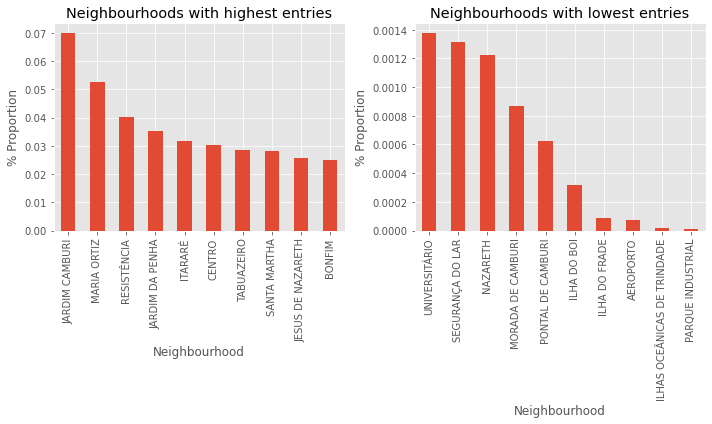

In [22]:
plt.figure(figsize=(10,6))
plt.subplot(1,2,1)
top_10_neighbhourhoods = medical['Neighbourhood'].value_counts(normalize = True).head(10)
top_10_neighbhourhoods.plot(kind = 'bar')
plt.title('Neighbourhoods with highest entries')
plt.xlabel('Neighbourhood')
plt.ylabel('% Proportion')

plt.subplot(1,2,2)
bottom_10_neighbhourhoods = medical['Neighbourhood'].value_counts(normalize = True).tail(10)
bottom_10_neighbhourhoods.plot(kind = 'bar')
plt.title('Neighbourhoods with lowest entries')
plt.xlabel('Neighbourhood')
plt.ylabel('% Proportion')


plt.tight_layout()
plt.show()

* The `Highest` numbers of `appointments` are from the `JARDIM CAMBURI`, `MARIA ORTIZ` and `RESISTÊNCIA`.
* The `Lowest` number of `appointment` is from `PARQUE INDUSTRIAL`.

If we have additional data on each neighbourhood's population, it might help us make better assumptions about appointments and communities.

### Categorical Data and some other Booleans

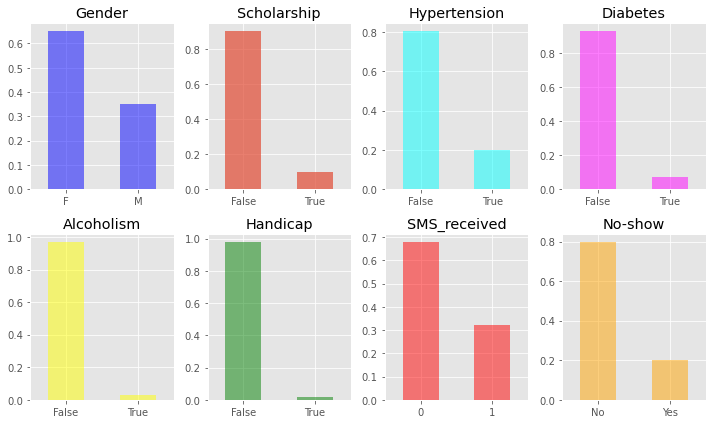

In [23]:
plt.figure(figsize=(10,6))
plt.subplot(2,4,1)
medical['Gender'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5, rot=0,color='blue')
plt.title('Gender')

plt.subplot(2,4,2)
medical['Scholarship'].value_counts(normalize = True).plot(kind = 'bar', rot=0,alpha=0.7)
plt.title('Scholarship')

plt.subplot(2,4,3)
medical['Hypertension'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5,rot=0,color='cyan')
plt.title('Hypertension')

plt.subplot(2,4,4)
medical['Diabetes'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5, rot=0,color='magenta')
plt.title('Diabetes')

plt.subplot(2,4,5)
medical['Alcoholism'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5, rot=0, color='yellow')
plt.title('Alcoholism')

plt.subplot(2,4,6)
medical['Handicap'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5, rot=0,color='green')
plt.title('Handicap')


plt.subplot(2,4,7)
medical['SMS_received'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5, rot=0,color='red')
plt.title('SMS_received')

plt.subplot(2,4,8)
medical['No-show'].value_counts(normalize = True).plot(kind = 'bar',alpha=0.5, rot=0,color='orange')
plt.title('No-show')

plt.tight_layout()
plt.show()

* **Scholarship** : `85%` of people who reserved the appointments `have no scholarship`.
* **Hypertension, Alcoholism & Diabetes** : `20%` of people are suffering from `Hypertension`. `Less than 10%` of people are suffering from `Diabetes` and `Alcoholism`.
* **SMS_received** : Approximately `70%` of the people did `not receive` any `SMS alerts` about the appointments.
* **No-Show**: Only `20%` of the appointments made turned out to be a `no-show`.


### AppointmentDay

In [24]:
print(max(medical['AppointmentDay']) - min(medical['AppointmentDay']))
print(min(medical['AppointmentDay']))
print(max(medical['AppointmentDay']))

40 days 00:00:00
2016-04-29 00:00:00
2016-06-08 00:00:00


**We have observed that `AppointmentDay ranges` from `2016-04-29 to 2016-06-08`, or I can say `40 days`.**

### Extract Weekday from AppointmentDay

Wednesday    0.234035
Tuesday      0.231982
Monday       0.205508
Friday       0.172077
Thursday     0.156045
Saturday     0.000353
Name: Appointment_WeekDay, dtype: float64


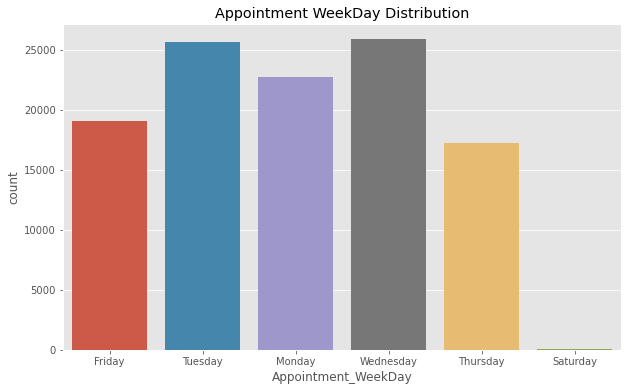

In [25]:
medical['Appointment_WeekDay'] = medical['AppointmentDay'].dt.day_name()

print(medical['Appointment_WeekDay'].value_counts(normalize = True))

plt.figure(figsize=(10,6))
sns.countplot(medical['Appointment_WeekDay'])
plt.title('Appointment WeekDay Distribution')
plt.show()

* 46% of the reserved appointments are on Tuesdays and Wednesdays.
* Other favourable appointments days are Mondays, Fridays and Thursdays.
* There are a measly number of appointments on Saturdays because it is a weekend day.

### ScheduledDay

In [26]:
medical['ScheduledDate']= medical['ScheduledDay'].dt.date.astype('datetime64[ns]')
print(max(medical['ScheduledDate']) - min(medical['ScheduledDate']))
print(min(medical['ScheduledDate']))
print(max(medical['ScheduledDate']))

211 days 00:00:00
2015-11-10 00:00:00
2016-06-08 00:00:00


`ScheduleDate` varies from **2015-11-10 to 2016-06-08**, around `seven months`. Interestingly, while the `appointment` range is `40 days`, the `schedule date` range is `seven months` in contrast.

### Extract weekday from ScheduledDay

Tuesday      0.236759
Wednesday    0.219514
Monday       0.208856
Friday       0.171136
Thursday     0.163518
Saturday     0.000217
Name: Scheduled_WeekDay, dtype: float64


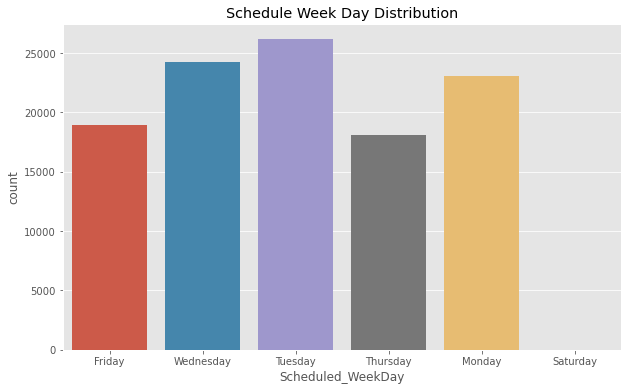

In [27]:
medical['Scheduled_WeekDay'] = medical['ScheduledDay'].dt.day_name()

print(medical['Scheduled_WeekDay'].value_counts(normalize = True))

plt.figure(figsize=(10,6))
sns.countplot(medical['Scheduled_WeekDay'])
plt.title('Schedule Week Day Distribution')
plt.show()

The highest number of appointments are scheduled on `Tuesdays`, followed by `Wednesdays` and `Mondays`. A similar kind of trend follows in Scheduled day as seen in Appointment Day.

# <a name="p5">Bi-variate Analysis</a>

### Age Category Vs No-Show

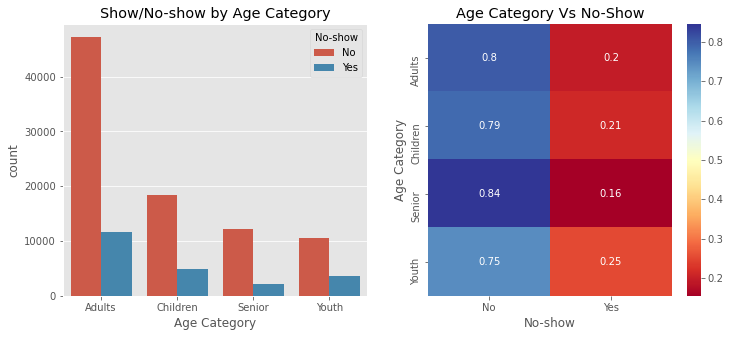

In [28]:
plt.figure(figsize=(12,5))

plt.subplot(121)
sns.countplot(medical['Age Category'],hue = medical['No-show'])
plt.title('Show/No-show by Age Category')

plt.subplot(122)
sns.heatmap(pd.crosstab(medical['Age Category'], medical['No-show'],normalize='index'),cmap="RdYlBu", annot=True)
plt.title('Age Category Vs No-Show')
plt.show()

Analyzing the bar plot, we can assume that the highest number of `No-shows` happen among `adults`, but the percentage values on the left give us a clear idea of this situation. 
* `Out of 100` appointments booked by the `Youth`;
* `25` of them turn out to be `No-show`, becoming the `highest` in the age categories;
* `Seniors` are the `most` who `attend` their `appointments`.
* It proves that `Age` can be a `determining factor` of a patient `showing or not showing up` for their appointment.

### Hypertension, Diabetes, Alcoholism VS No-show

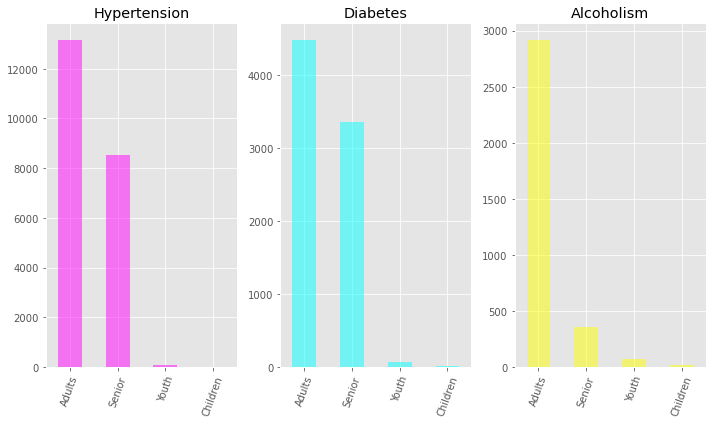

In [29]:
plt.figure(figsize=(10,6))

plt.subplot(131)
df_Hipertension = medical[medical['Hypertension'] == 1]
df_Hipertension['Age Category'].value_counts().plot(kind = 'bar',alpha=0.5, rot=70,color='magenta')
plt.title('Hypertension')

plt.subplot(132)
df_Diabetes = medical[medical['Diabetes'] == 1]
df_Diabetes['Age Category'].value_counts().plot(kind = 'bar',alpha=0.5, rot=70,color='cyan')
plt.title('Diabetes')

plt.subplot(133)
df_Alcoholism = medical[medical['Alcoholism'] == 1]
df_Alcoholism['Age Category'].value_counts().plot(kind = 'bar',alpha=0.5, rot=70,color='yellow')
plt.title('Alcoholism')

plt.tight_layout()
plt.show()

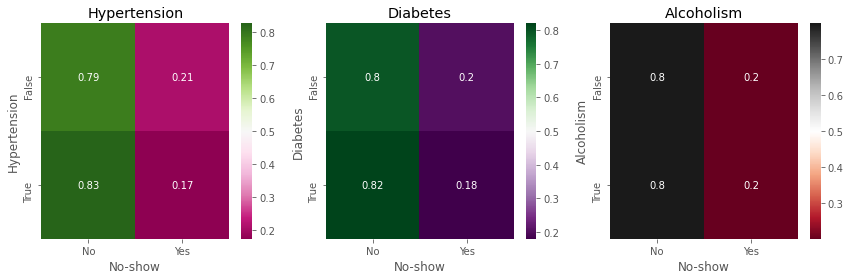

In [30]:
plt.figure(figsize=(12,4))
plt.subplot(131)
sns.heatmap(pd.crosstab(medical['Hypertension'], medical['No-show'],normalize='index'),cmap="PiYG", annot=True)
plt.title('Hypertension')

plt.subplot(132)
sns.heatmap(pd.crosstab(medical['Diabetes'], medical['No-show'],normalize='index'),cmap="PRGn", annot=True)
plt.title('Diabetes')

plt.subplot(133)
sns.heatmap(pd.crosstab(medical['Alcoholism'], medical['No-show'],normalize='index'),cmap="RdGy", annot=True)
plt.title('Alcoholism')

plt.tight_layout()
plt.show()

**Hypertension**

* There are 88,000 patients not suffering from Hypertension, and 79% are showing up for their appointment.
* Out of 22,500 patients with Hypertension, 83% of them showed up for an appointment.

**Diabetes**

* There are 102,000 patients not suffering from Hypertension, and 80% of them are showing up for their appointment.
* Out of 8,500 patients with Hypertension, 82% of them showed up for an appointment.

**Alcoholism**

* 80% of both alcoholics and non-alcoholics are showing up for their appointments.

The above graphs convey that the probability of suffering/not suffering from Hypertension or Diabetes has a significant effect on patients' likelihood of showing up for their appointment. Whereas, Alcoholics or Non-alcoholics have the same probability.

### Neighbourhood Vs No-show

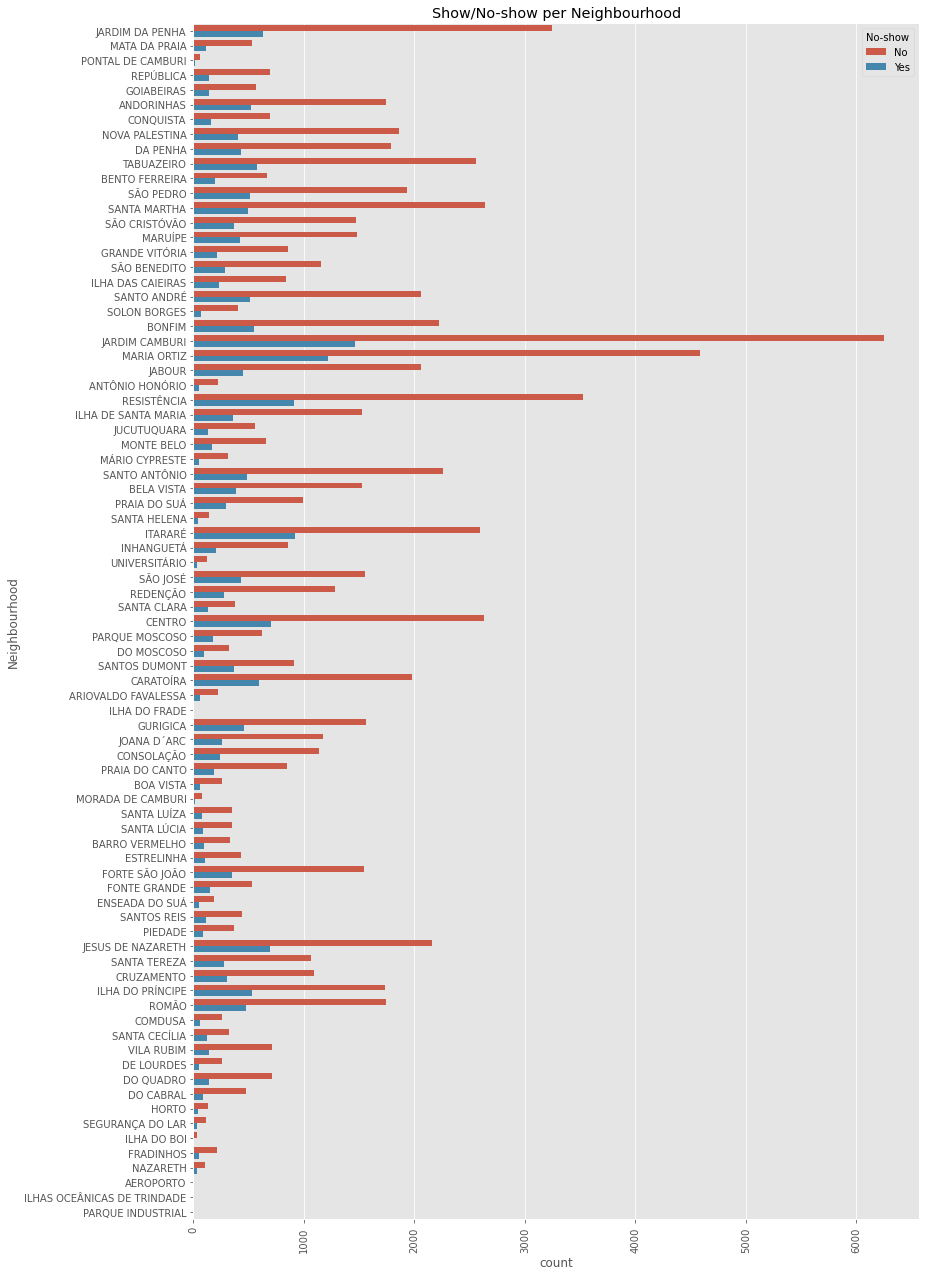

In [31]:
plt.figure(figsize=(13,22))
sns.countplot(y = medical['Neighbourhood'],hue = medical['No-show'])
plt.title('Show/No-show per Neighbourhood')
plt.xticks(rotation = 90)
plt.show()

The above visualization does not give a clear idea of `Neighbourhood Vs No-Show`. Calculating the `number` of `no-shows` to the `total` number of `scheduled appointments` may present a clear picture. The lower the ratio, the `lower` is the no of `No-shows` and `vice-versa`.

### Scheduled to Show/No-show Ratio

                  Neighbourhood  Schedules  No-shows  \
34  ILHAS OCEÂNICAS DE TRINDADE          2         2   
70                SANTOS DUMONT       1276       369   
61                SANTA CECÍLIA        448       123   
62                  SANTA CLARA        506       134   
36                      ITARARÉ       3514       923   

    No-Shows to Schedule Ratio  
34                    1.000000  
70                    0.289185  
61                    0.274554  
62                    0.264822  
36                    0.262664  


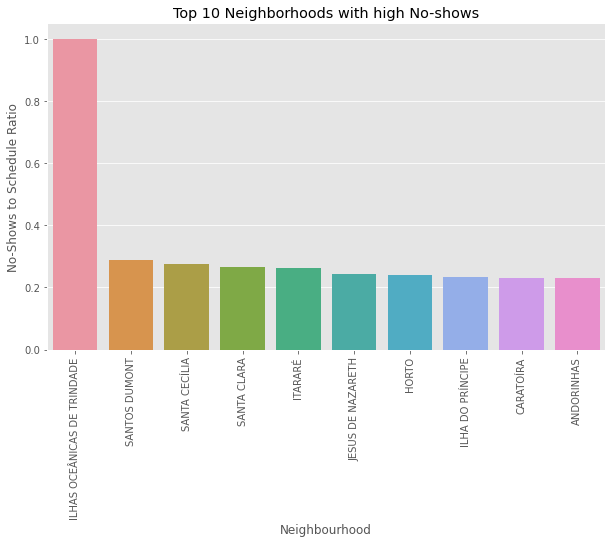

In [32]:
medical['No-show'] = medical['No-show'].map({'Yes': 1, 'No': 0})
grouped = medical.groupby(['Neighbourhood']).agg({'PatientId':'count','No-show':'sum'}).reset_index()
grouped.rename(columns = {'PatientId':'Schedules','No-show':'No-shows'}, inplace = True) 
grouped['No-Shows to Schedule Ratio'] = grouped['No-shows']/grouped['Schedules']

high_no_shows = grouped.sort_values(by = 'No-Shows to Schedule Ratio',ascending = False)[:10]
print(high_no_shows.head())

plt.figure(figsize=(10,6))
sns.barplot(x='Neighbourhood',y='No-Shows to Schedule Ratio',data=high_no_shows)
plt.title('Top 10 Neighborhoods with high No-shows')
plt.xticks(rotation = 90)
plt.show()

        Neighbourhood  Schedules  No-shows  No-Shows to Schedule Ratio
51  PARQUE INDUSTRIAL          1         0                    0.000000
31        ILHA DO BOI         35         3                    0.085714
0           AEROPORTO          8         1                    0.125000
48     MÁRIO CYPRESTE        371        54                    0.145553
73       SOLON BORGES        469        69                    0.147122


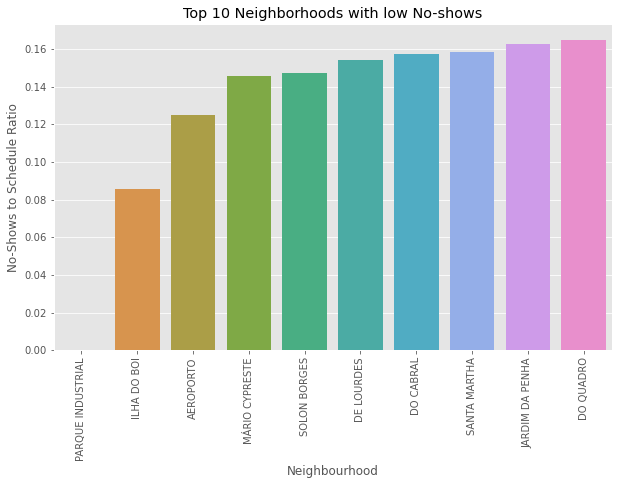

In [33]:
low_no_shows = grouped.sort_values(by = 'No-Shows to Schedule Ratio',ascending = True)[:10]
print(low_no_shows.head())

plt.figure(figsize=(10,6))
sns.barplot(x='Neighbourhood',y='No-Shows to Schedule Ratio',data=low_no_shows)
plt.title('Top 10 Neighborhoods with low No-shows')
plt.xticks(rotation = 90)
plt.show()

### Scholarship Vs No-Show

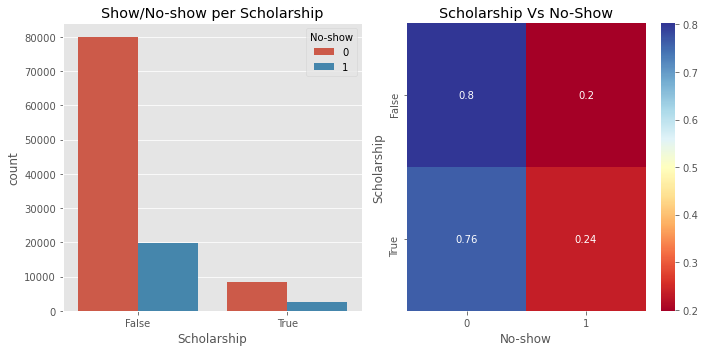

In [34]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(medical['Scholarship'],hue=medical['No-show'])
plt.title('Show/No-show per Scholarship')

plt.subplot(122)
sns.heatmap(pd.crosstab(medical['Scholarship'], medical['No-show'],normalize='index'),cmap="RdYlBu", annot=True)
plt.title('Scholarship Vs No-Show')

plt.tight_layout()
plt.show()

* There are `100,000 patients` with `no scholarship` and `80%` of them are `showing up` for their appointment.
* Out of `10,500 patients` with `Scholarship`, `76%` of them `showed up` for appointment.

### Appointment day, Scheduled Day VS No-show

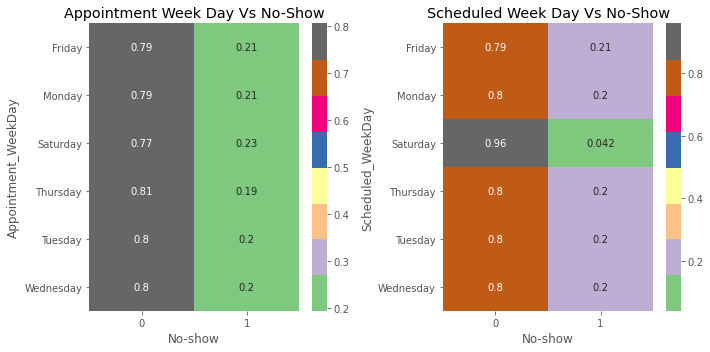

In [35]:
plt.figure(figsize=(10,5))
plt.subplot(1,2,1)
sns.heatmap(pd.crosstab(medical['Appointment_WeekDay'],medical['No-show'],normalize='index'),cmap="Accent", annot=True)
plt.title('Appointment Week Day Vs No-Show')

plt.subplot(1,2,2)
sns.heatmap(pd.crosstab(medical['Scheduled_WeekDay'], medical['No-show'],normalize='index'),cmap="Accent", annot=True)
plt.title('Scheduled Week Day Vs No-Show')

plt.tight_layout()
plt.show()

In [36]:
medical['SMS_received'].value_counts()

0    75044
1    35482
Name: SMS_received, dtype: int64

It looks like there is `no` significant `relationship` between the `weekday` and the `probability` of the patient `showing/not showing up` for the appointment. 
But we can observe that the `percentage` of `No-show` is `high` during `Saturdays`. 

**The number of days between the Scheduled date and Appointment date could reveal more details.**

### Calculate the waiting days to the Appointment Date.

In [37]:
medical['Wait_Days'] = (medical['AppointmentDay']-medical['ScheduledDay'])
medical['Wait_Days'] = medical['Wait_Days'].dt.days
medical['Wait_Days'].describe()

count    110526.000000
mean          9.183794
std          15.255034
min          -7.000000
25%          -1.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Wait_Days, dtype: float64

There `cannot` be a `negative` number of `wait days` because the `scheduled date` cannot be `after` the `appointment date`. Checking how many number of such rows exist in the data before dropping them.

In [38]:
df_wait = medical[medical['Wait_Days']<0]
df_wait.shape

(38567, 19)

There are `38567` rows in the data with a `scheduled date` later than the `appointment date`. `we cannot` just `drop` this considerable amount of data. Instead, `we can reset the scheduled date to the appointment date.`

In [39]:
medical['AppointmentDay'] = np.where((medical['AppointmentDay'] - medical['ScheduledDay']).dt.days < 0, medical['ScheduledDay'], medical['AppointmentDay'])

In [40]:
medical['Wait_Days'] = (medical['AppointmentDay']-medical['ScheduledDay'])
medical['Wait_Days'] = medical['Wait_Days'].dt.days
medical['Wait_Days'].describe()

count    110526.000000
mean          9.532825
std          15.027769
min           0.000000
25%           0.000000
50%           3.000000
75%          14.000000
max         178.000000
Name: Wait_Days, dtype: float64

We can observe that `25%` of the `appointments` are made on the `same day of appointment`. An `average` value of the `wait days` is around `9 days`.

No-show
0     8.171619
1    14.912451
Name: Wait_Days, dtype: float64


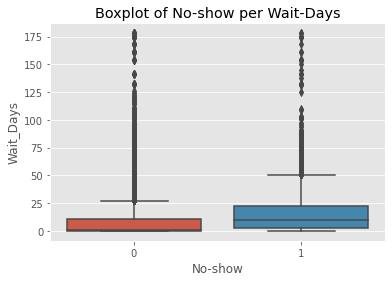

In [41]:
print(medical.groupby(['No-show'])['Wait_Days'].mean())

sns.boxplot(x='No-show',y='Wait_Days',data = medical)
plt.title('Boxplot of No-show per Wait-Days')
plt.show()

The `average wait` among the patients with `No-show` are `14 days(2 weeks)` and `8 days` among the patient who `show up` at appointments. 

In [42]:
print(medical.groupby(['Age Category'])['Wait_Days'].mean())

Age Category
Adults       9.598060
Children     9.112869
Senior      10.609846
Youth        8.848751
Name: Wait_Days, dtype: float64


The `average wait` time among different `age categories` looks similar with no huge differences.

### SMS Received Vs No-Show

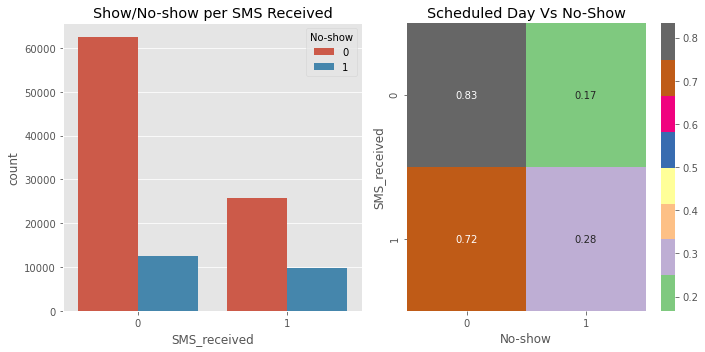

In [43]:
plt.figure(figsize=(10,5))
plt.subplot(121)
sns.countplot(medical['SMS_received'],hue=medical['No-show'])
plt.title('Show/No-show per SMS Received')

plt.subplot(122)
sns.heatmap(pd.crosstab(medical['SMS_received'], medical['No-show'],normalize='index'),cmap="Accent", annot=True)
plt.title('Scheduled Day Vs No-Show')

plt.tight_layout()
plt.show()

# <a name="p6">Machine Learning Data Preparation</a>

We will create a `new variable` called `ml_df` and we will `reuse` the `medical object`. That would make easier to separate this project into two parts with no interference of each other.

In [44]:
ml_df = medical

Convert No-show: `"Yes"` = **1**, `"No"` = **0**

In [45]:
ml_df['No-show'].replace(to_replace="Yes", value=1, inplace = True)
ml_df['No-show'].replace(to_replace="No", value=0, inplace = True)
ml_df[['No-show']].head(10)

,No-show
0,0
1,0
2,0
3,0
4,0
5,0
6,1
7,1
8,0
9,0


Convert Gender: `"F"` = **1**, `"M"` = **0**

In [46]:
ml_df['Gender'].replace(to_replace="F", value=1, inplace = True)
ml_df['Gender'].replace(to_replace="M", value=0, inplace = True)
ml_df[['Gender']].head(10)

,Gender
0,1
1,0
2,1
3,1
4,1
5,1
6,1
7,1
8,1
9,1


From `ScheduledDay` we will extract the `month` and place it to a `new column` named `Month_Scheduled.`

In [47]:
ml_df["Month_Scheduled"]= medical["ScheduledDay"].dt.month
ml_df["Month_Scheduled"]

0         4
1         4
2         4
3         4
4         4
         ..
110522    5
110523    5
110524    4
110525    4
110526    4
Name: Month_Scheduled, Length: 110526, dtype: int64

Evaluate the `Frequency` of Past `Missed Appointments.`

In [48]:
ml_df['Num_Apt_Missed'] = ml_df.groupby('PatientId')['No-show'].apply(lambda x: x.cumsum())

ml_df[['Num_Apt_Missed']].head()

,Num_Apt_Missed
0,0
1,0
2,0
3,0
4,0


Deleting rows with `Age < 0` 

In [49]:
ml_df = ml_df[ml_df.Age>=0]

**Correlation Heatmap**

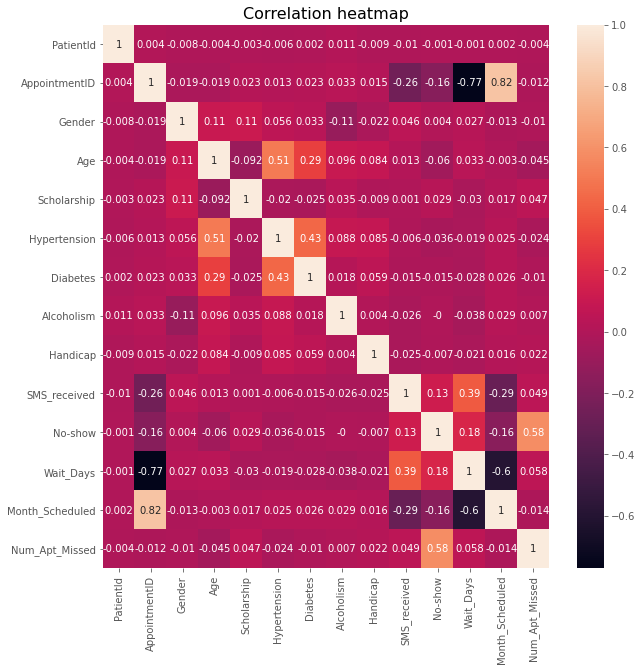

In [50]:
plt.figure(figsize=(10,10))
sns.heatmap(ml_df.corr().round(3), annot = True)
plt.title('Correlation heatmap', size='16')
plt.show()

**Drop** useless columns for **Machine Learning**

In [51]:
df_data =  ml_df.drop(["PatientId", "AppointmentID", "ScheduledDay", "AppointmentDay"], 1)

df_data.drop(["Handicap", "Alcoholism","Hypertension","Age Category","Appointment_WeekDay","ScheduledDate","Scheduled_WeekDay","Wait_Days","Neighbourhood",
              "Diabetes","Scholarship"], 1, inplace = True)
    
df_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110526 entries, 0 to 110526
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype
---  ------           --------------   -----
 0   Gender           110526 non-null  int64
 1   Age              110526 non-null  int64
 2   SMS_received     110526 non-null  int64
 3   No-show          110526 non-null  int64
 4   Month_Scheduled  110526 non-null  int64
 5   Num_Apt_Missed   110526 non-null  int64
dtypes: int64(6)
memory usage: 5.9 MB


### Import Machine Learning Libraries

In [52]:
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score

from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score 


### Split the data for Training and Testing

We will use `Gender`, `Age`, `SMS_Received`, `Month_Scheduled` and `Num_Apt_Missed` to `predict` over the `No-show column` whether a patient will `show or no-show an appointment`.

In [53]:
X = df_data.copy()
X = X.drop("No-show", axis = 1).values
y = df_data.loc[:,"No-show"].values

print("Proportion of response")
for i in np.unique(y) :
    print("The number of {} is {} accouting for {}%.".format(i, np.bincount(y)[i], np.round(np.bincount(y)[i]/len(y), 3)*100 ))

Proportion of response
The number of 0 is 88207 accouting for 79.80000000000001%.
The number of 1 is 22319 accouting for 20.200000000000003%.


### Analyze the Split Data

In [54]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .25, random_state=25)

print("Proportion of response in train set")
for i in np.unique(y_train) :
    print("The number of {} is {} accounting for {}%.".format(i, np.bincount(y_train)[i], np.round(np.bincount(y_train)[i]/len(y_train), 3)*100 ))
print("\nProportion of response in test set")
for i in np.unique(y_test) :
    print("The number of {} is {} accounting for {}%.".format(i, np.bincount(y_test)[i], np.round(np.bincount(y_test)[i]/len(y_test), 3)*100 ))

Proportion of response in train set
The number of 0 is 66172 accounting for 79.80000000000001%.
The number of 1 is 16722 accounting for 20.200000000000003%.

Proportion of response in test set
The number of 0 is 22035 accounting for 79.7%.
The number of 1 is 5597 accounting for 20.3%.


### Over-sampling the Split Data

In [55]:
from imblearn.over_sampling import SMOTE
X_train, y_train = SMOTE().fit_sample(X_train, y_train)

print("Proportion of response in train set using SMOTE")
for i in np.unique(y_train) :
    print("The number of {} is {} accounting for {}%.".format(i, np.bincount(y_train)[i], np.round(np.bincount(y_train)[i]/len(y_train), 3)*100 ))

Proportion of response in train set using SMOTE
The number of 0 is 66172 accounting for 50.0%.
The number of 1 is 66172 accounting for 50.0%.


# <a name="p7">Machine Learning Algorithm Task</a>

**K-Nearest Neighbourhood Classifier**: We can use this algorithm for either `Classification` and `Regression` problems; it is easy to interpret, it has low calculation time and predictive efficiency. (Tavish Srivastava and Analytics Vidhya 2018)


**Naive Bayes**: It is a `Classification Algorithm` based on the `Bayes Theorem` with an assumption of independence among predictors. `It assumes that a particular feature in a class is unrelated to the presence of any other component`. It is easy to build and valuable, particularly for `huge datasets`.

There are **three types** of this algorithm model in the scikit-learn library:

- **Gaussian**: It is used in `classification` and assumes that features follow a `normal distribution`.

- **Multinomial**: It is used for `discrete` counts like `text classification` problem. Here we can consider Bernoulli trials which is one step further, and instead of “word occurring in the document”, we have “count how often word occurs in the document”, you can think of it as `“number of times outcome number x_i is observed over the n trials”.`(Sunil Ray and Analytics Vidhya 2017)

- **Bernoulli**: The `binomial model` is helpful if your feature vectors are binary like `zeros and ones`. This model is used in the industry for text classification with "bag of words" where `1s and 0s` are `"word occurs in the document"` and `"word does not occur in the document"`, It seems the perfect match for our problem but, we will implement each of these models to get a final result.

### K-Nearest Neighborhood Classifier

- Predict Output
- Classification Report
- Store Performance Metrics

In [56]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import neighbors
n_neighbors = 5
nnc = neighbors.KNeighborsClassifier(n_neighbors)
nnc.fit(X_train, y_train)

y_pred= nnc.predict(X_test)


NNC_result = classification_report(y_test, y_pred)
print(NNC_result)


NNC_accuracy = accuracy_score(y_test, y_pred)
NNC_precision = precision_score(y_test, y_pred)
NNC_recall = recall_score(y_test, y_pred)
NNC_f1 = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.99      0.89      0.93     22035
           1       0.68      0.95      0.79      5597

    accuracy                           0.90     27632
   macro avg       0.83      0.92      0.86     27632
weighted avg       0.92      0.90      0.90     27632



### Naive Bayes - Bernoulli 

- Predict Output
- Classification report
- Store performance metrics

In [57]:
from sklearn.naive_bayes import BernoulliNB

bernb = BernoulliNB()
bernb.fit(X_train, y_train)


y_pred= bernb.predict(X_test)


BERNB_result = classification_report(y_test, y_pred)
print(BERNB_result)


BERNB_accuracy = accuracy_score(y_test, y_pred)
BERNB_precision = precision_score(y_test, y_pred)
BERNB_recall = recall_score(y_test, y_pred)
BERNB_f1 = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       1.00      0.87      0.93     22035
           1       0.66      1.00      0.80      5597

    accuracy                           0.90     27632
   macro avg       0.83      0.94      0.86     27632
weighted avg       0.93      0.90      0.90     27632



### Naive Bayes - Gaussian

- Predict Output
- Classification Report
- Store Performance Metrics

In [58]:
from sklearn.naive_bayes import GaussianNB

gausb = GaussianNB()
gausb.fit(X_train, y_train)


y_pred= gausb.predict(X_test)


GAUSB_result = classification_report(y_test, y_pred)
print(GAUSB_result)


GAUSB_accuracy = accuracy_score(y_test, y_pred)
GAUSB_precision = precision_score(y_test, y_pred)
GAUSB_recall = recall_score(y_test, y_pred)
GAUSB_f1 = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.98      0.89      0.93     22035
           1       0.67      0.91      0.77      5597

    accuracy                           0.89     27632
   macro avg       0.82      0.90      0.85     27632
weighted avg       0.91      0.89      0.90     27632



### Naive Bayes - Multinomial

- Predict Output
- Classification Report
- Store Performance Metrics

In [59]:
from sklearn.naive_bayes import MultinomialNB

multnb = MultinomialNB()
multnb.fit(X_train, y_train)


y_pred= multnb.predict(X_test)


MULTNB_result = classification_report(y_test, y_pred)
print(MULTNB_result)


MULTNB_accuracy = accuracy_score(y_test, y_pred)
MULTNB_precision = precision_score(y_test, y_pred)
MULTNB_recall = recall_score(y_test, y_pred)
MULTNB_f1 = f1_score(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.97      0.84      0.90     22035
           1       0.58      0.89      0.70      5597

    accuracy                           0.85     27632
   macro avg       0.77      0.86      0.80     27632
weighted avg       0.89      0.85      0.86     27632



### Choose an Algorithm
 
 **Accuracy** : the proportion of the total number of predictions that were correct.

**Positive Predictive Value(PPV) or Precision** : the proportion of positive cases that were correctly identified.

**Negative Predictive Value(NPV)** : the proportion of negative cases that were correctly identified.

**Sensitivity(TPR) or Recall** : the proportion of actual positive cases which are correctly identified.

**Specificity(TNR)** : the proportion of actual negative cases which are correctly identified.


Which metric do we care most? Accuracy, Sensitivity(TPR), F1-score
 - Accuracy: How many Shows and No-shows are correctly predicted? 
 - Sessitivity(TPR): How many No-shows are correctly predicted among unseen observations a model predicted as No-show? 
  * The proportion of actual No-shows(TP) among predictions lebled as No-show(TP + FN)
  * The larger the TPR, the lesser false positives a model predicts.
 - F1-score: Weighted accuracy between recall and precision.
   * We can get a sense of a model's performance in general.

KNN: 0.930295 (0.003492)
B_NB: 0.935433 (0.001997)
G_NB: 0.898242 (0.003368)
M_NB: 0.854349 (0.005857)


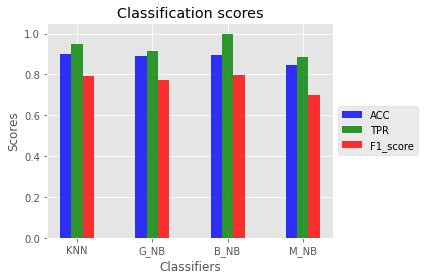

In [60]:
models = []

models.append(('KNN', neighbors.KNeighborsClassifier()))
models.append(('B_NB', BernoulliNB()))
models.append(('G_NB', GaussianNB()))
models.append(('M_NB', MultinomialNB() ))


results = []
names = []
for name, model in models:
 kfold = StratifiedKFold(n_splits=10, random_state=1, shuffle=True)
 cv_results = cross_val_score(model, X_train, y_train, cv=kfold, scoring='accuracy')
 results.append(cv_results)
 names.append(name)
 print('%s: %f (%f)' % (name, cv_results.mean(), cv_results.std())) 


n_groups = 4

 

fig, ax = plt.subplots()
index = np.arange(n_groups)
bar_width = 0.15
opacity = 0.8
 
rects1 = plt.bar(index, [NNC_accuracy, GAUSB_accuracy, BERNB_accuracy, MULTNB_accuracy] , bar_width,
                 alpha=opacity,
                 color='b',
                 label='ACC')
 
rects2 = plt.bar(index + bar_width, [ NNC_recall, GAUSB_recall, BERNB_recall, MULTNB_recall], bar_width,
                 alpha=opacity,
                 color='g',
                 label='TPR')

rects3 = plt.bar(index + 2*bar_width, [NNC_f1, GAUSB_f1, BERNB_f1, MULTNB_f1], bar_width,
                 alpha=opacity,
                 color='r',
                 label='F1_score')


plt.xlabel('Classifiers')
plt.ylabel('Scores')
plt.title('Classification scores')
plt.xticks(index + bar_width, ('KNN', "G_NB", "B_NB","M_NB"))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.tight_layout()
plt.show()

# <a name="p8">Conclusion</a>

As expected, `Bernoulli` outperforms all other `Naive Bayes` models and the `KNN` one. Although `KNN` almost reached the `same accuracy`, `Bernoulli` gives more accurate and precise results as compared to other models. It is fast and able to make `real-time predictions`. It can handle irrelevant features nicely. Therefore, we will predict `1s` and `0s` from the `No-show` column faster because `Bernoulli is a binomial model`, explaining why it is our chosen model with `93% accuracy.`

# <a name="p9">Create a Pipeline</a>

I will define a function that processes our input to predict whether a Patient will show or not show. 
If `y_pred` is equal to **1** the patient `will no-show` to their appointment.

In [61]:
def predict_appointment(test):
    bernb = BernoulliNB()
    bernb.fit(X_train, y_train)
    y_pred= bernb.predict(test)
    
    if y_pred == 1:
        print("***** The patient will no-show *********")
    else:
        print("***** The patient will show ******")
    

In [62]:
a = []


def question():
    gender = int(input("What is the Patient`s gender? 1 for Female or 0 for Male: "))
    a.append(gender)

    age = int(input("How old is the Patient? "))
    a.append(age)

    sms = int(input("Did the Patient receive an SMS message? 1 for YES or 0 for NO: "))
    a.append(sms)

    month = int(input("Which month is the appointment scheduled? From 1 to 12 correspoding the month: ")) 
    a.append(month)

    missed = int(input("How many Appointments missed? From 0 to 18: "))
    a.append(missed)

    test = [a]

    print("\n")
    print("HERE IS THE PREDICTION: ")
    print("*************************************")
    predict_appointment(test)
    print("*************************************")

question()

What is the Patient`s gender? 1 for Female or 0 for Male: 0
How old is the Patient? 23
Did the Patient receive an SMS message? 1 for YES or 0 for NO: 1
Which month is the appointment scheduled? From 1 to 12 correspoding the month: 7
How many Appointments missed? From 0 to 18: 9


HERE IS THE PREDICTION: 
*************************************
***** The patient will no-show *********
*************************************


### Sample Patients who did not attend to their appointments.


In [63]:
df_data[df_data['No-show'] == 1].head()

,Gender,Age,SMS_received,No-show,Month_Scheduled,Num_Apt_Missed
6,1,23,0,1,4,1
7,1,39,0,1,4,1
11,0,29,1,1,4,1
17,1,40,0,1,4,1
20,1,30,0,1,4,1


### Sample Patients who attended to their appointments.

In [64]:
df_data[df_data['No-show'] == 0].head()

,Gender,Age,SMS_received,No-show,Month_Scheduled,Num_Apt_Missed
0,1,62,0,0,4,0
1,0,56,0,0,4,0
2,1,62,0,0,4,0
3,1,8,0,0,4,0
4,1,56,0,0,4,0


# <a name="p10">References</a>

Sunil Ray and Analytics Vidhya (2017) 6 Easy Steps to Learn Naive Bayes Algorithm with codes in Python and R, Available at: https://www.analyticsvidhya.com/blog/2017/09/naive-bayes-explained/ (Accessed: 6th April 2021).

Tavish Srivastava and Analytics Vidhya (2018) Introduction to k-Nearest Neighbors: A powerful Machine Learning Algorithm (with implementation in Python & R), Available at: https://www.analyticsvidhya.com/blog/2018/03/introduction-k-neighbours-algorithm-clustering/ (Accessed: 6th April 2021).